## Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url = '/Users/arpanganguli/Documents/Professional/Analysis/ISLR/Datasets/Auto.csv'
Auto = pd.read_csv(url)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix
1,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
2,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
3,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom
4,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala


## 7.a. Creating a binary variable that takes on a $1$ for cars with gas mileage move the median, $0$ otherwise

In [4]:
mpg_median = Auto.mpg.median()
mpg_median

22.75

In [5]:
Auto['med'] = np.where(Auto.mpg > mpg_median, 1, 0)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,med
0,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix,0
1,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
2,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw),0
3,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom,0
4,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0


In [6]:
Auto.med.value_counts()

1    196
0    196
Name: med, dtype: int64

Text(0.5,1,'miles per gallon and median value')

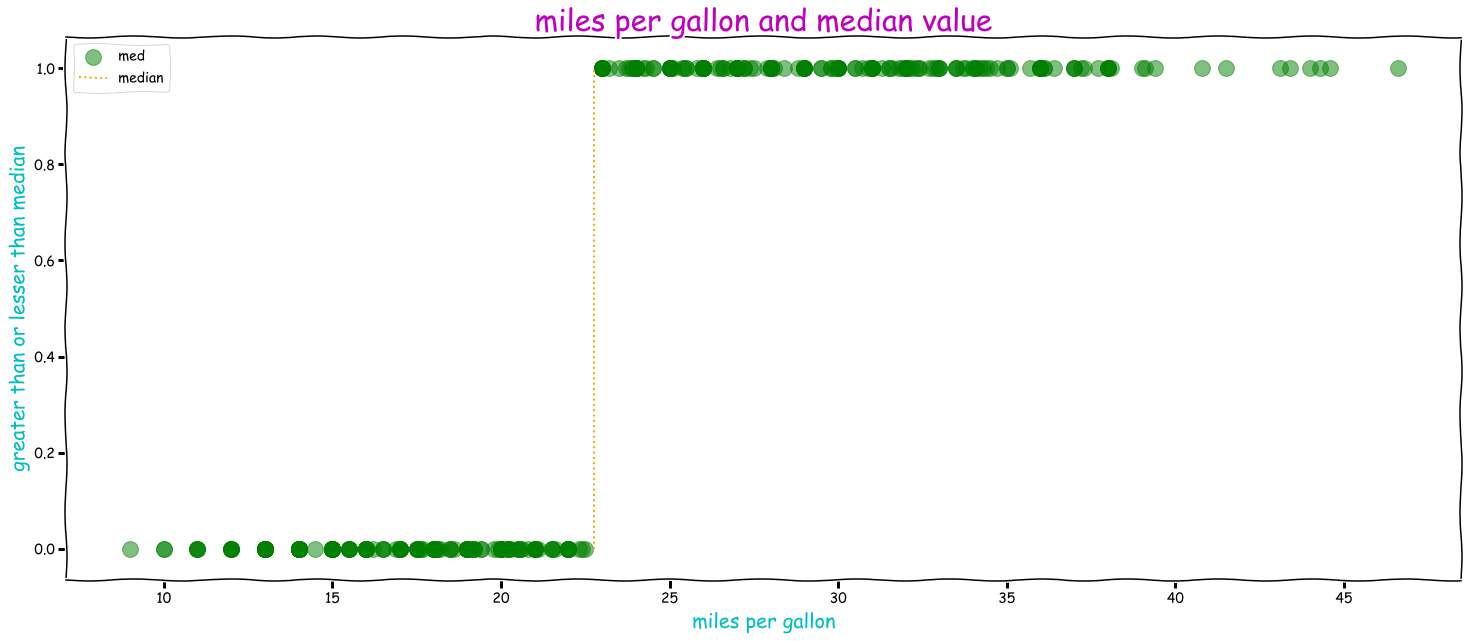

In [7]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(Auto.mpg, Auto.med, color='green', s=250, alpha=0.5)
plt.vlines(x=mpg_median, ymin=0.0, ymax=1.0, colors='orange', linestyles='dotted', label='median')
plt.legend()
plt.xlabel('miles per gallon', fontsize=20, color='c')
plt.ylabel('greater than or lesser than median', fontsize=20, color='c')
plt.title('miles per gallon and median value', fontsize=30, color='m')

In [8]:
Auto.horsepower.dtype

dtype('int64')

In [9]:
Auto['hp'] = Auto.horsepower.astype(float)

In [10]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,med,hp
0,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix,0,230.0
1,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0,225.0
2,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw),0,225.0
3,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom,0,225.0
4,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0,220.0


In [11]:
Auto.hp.dtype

dtype('float64')

In [12]:
Auto.drop(columns='horsepower', inplace=True)
Auto.head()

,mpg,cylinders,displacement,weight,acceleration,year,origin,name,med,hp
0,16.0,8,400.0,4278,9.5,73,1,pontiac grand prix,0,230.0
1,14.0,8,455.0,4425,10.0,70,1,pontiac catalina,0,225.0
2,14.0,8,455.0,3086,10.0,70,1,buick estate wagon (sw),0,225.0
3,12.0,8,455.0,4951,11.0,73,1,buick electra 225 custom,0,225.0
4,14.0,8,454.0,4354,9.0,70,1,chevrolet impala,0,220.0


In [13]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
med             392 non-null int64
hp              392 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 30.7+ KB


***

## 7.b. Fitting support vector classification for different values of $cost$

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV as GSV
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
df = Auto.drop(columns=['name', 'mpg', 'med'])
Y = Auto['med']

In [26]:
# cost = 10
svmfit10 = SVC(C=10, kernel='linear').fit(df, Y)

In [27]:
conf_mat10 = pd.DataFrame(confusion_matrix(Y, svmfit10.predict(df)).T, index = svmfit10.classes_, columns = svmfit10.classes_)
conf_mat10

,0,1
0,175,17
1,21,179


In [28]:
class_mat10 = classification_report(Y, svmfit10.predict(df))
print(class_mat10)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       196
           1       0.90      0.91      0.90       196

   micro avg       0.90      0.90      0.90       392
   macro avg       0.90      0.90      0.90       392
weighted avg       0.90      0.90      0.90       392



In [30]:
# cost = 1
svmfit1 = SVC(C=1, kernel='linear').fit(df, Y)

In [31]:
conf_mat1 = pd.DataFrame(confusion_matrix(Y, svmfit1.predict(df)).T, index = svmfit1.classes_, columns = svmfit1.classes_)
conf_mat1

,0,1
0,174,15
1,22,181


In [32]:
class_mat1 = classification_report(Y, svmfit1.predict(df))
print(class_mat1)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       196
           1       0.89      0.92      0.91       196

   micro avg       0.91      0.91      0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



In [33]:
# cost = 0.25
svmfit025 = SVC(C=0.25, kernel='linear').fit(df, Y)

In [34]:
conf_mat025 = pd.DataFrame(confusion_matrix(Y, svmfit025.predict(df)).T, index = svmfit025.classes_, columns = svmfit025.classes_)
conf_mat025

,0,1
0,174,12
1,22,184


In [35]:
class_mat025 = classification_report(Y, svmfit025.predict(df))
print(class_mat025)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       196
           1       0.89      0.94      0.92       196

   micro avg       0.91      0.91      0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



In [36]:
# cost = 20
svmfit20 = SVC(C=20, kernel='linear').fit(df, Y)

In [37]:
conf_mat20 = pd.DataFrame(confusion_matrix(Y, svmfit20.predict(df)).T, index = svmfit20.classes_, columns = svmfit20.classes_)
conf_mat20

,0,1
0,175,17
1,21,179


In [38]:
class_mat20 = classification_report(Y, svmfit20.predict(df))
print(class_mat20)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       196
           1       0.90      0.91      0.90       196

   micro avg       0.90      0.90      0.90       392
   macro avg       0.90      0.90      0.90       392
weighted avg       0.90      0.90      0.90       392



In [39]:
# cost = 1000
svmfit1000 = SVC(C=1000, kernel='linear').fit(df, Y)

In [40]:
conf_mat1000 = pd.DataFrame(confusion_matrix(Y, svmfit1000.predict(df)).T, index = svmfit1000.classes_, columns = svmfit1000.classes_)
conf_mat1000

,0,1
0,175,17
1,21,179


In [41]:
class_mat1000 = classification_report(Y, svmfit1000.predict(df))
print(class_mat1000)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       196
           1       0.90      0.91      0.90       196

   micro avg       0.90      0.90      0.90       392
   macro avg       0.90      0.90      0.90       392
weighted avg       0.90      0.90      0.90       392



In [98]:
cost_range = [{'C': [0.01, 0.1, 1, 5, 10, 100, 1000, 10000]}]
cost_cv= GSV(SVC(kernel='linear'), cost_range, cv=10, scoring='accuracy').fit(df, Y)

In [47]:
means = pd.DataFrame([cost_cv.cv_results_['mean_test_score']]).T
means.columns = ['means']
means.head()

,means
0,0.920906
1,0.922617
2,0.911842
3,0.910996
4,0.909865


Text(0,0.5,'accuracy score')

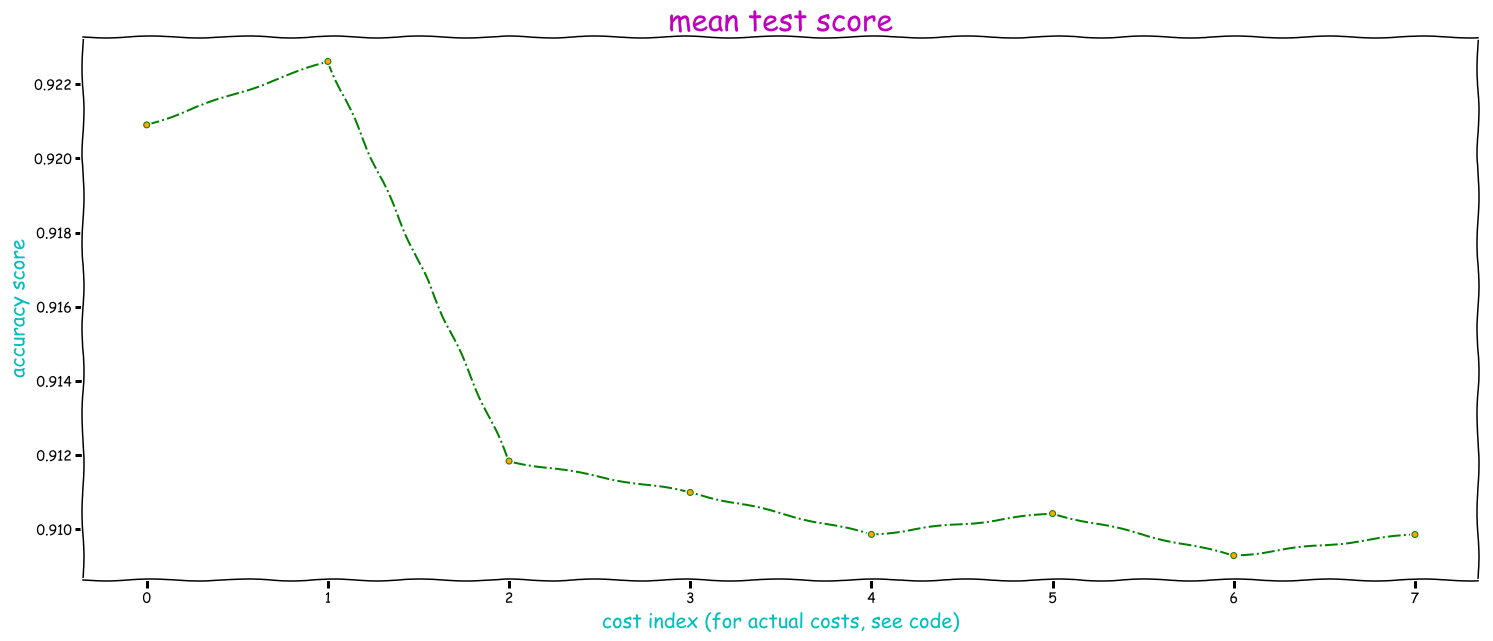

In [50]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(means, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('mean test score', fontsize=30, color='m')
plt.xlabel('cost index (for actual costs, see code)', fontsize=20, color='c')
plt.ylabel('accuracy score', fontsize=20, color='c')

*I get the highest accuracy at $cost$=1.*

***

## 7.c. Fitting support vector machines with radial and polynomial basis kernels with different values of $cost$, $degree$ & $gamma$

In [83]:
cost_range = [{'C': [0.01, 0.1, 1, 5, 10, 100, 1000, 10000], 'gamma': [0.05, 0.75, 1, 3, 5, 10, 12, 14], 
              'degree': [3, 5, 7, 10, 12, 15, 17, 25]}]
cost_cv= GSV(SVC(kernel='rbf'), cost_range, cv=10, scoring='accuracy').fit(df, Y)

In [94]:
means = pd.DataFrame([cost_cv.cv_results_['mean_test_score']]).T
means.columns = ['means']
means.head()

,means
0,0.540816
1,0.522959
2,0.520408
3,0.510204
4,0.505102


Text(0,0.5,'accuracy score')

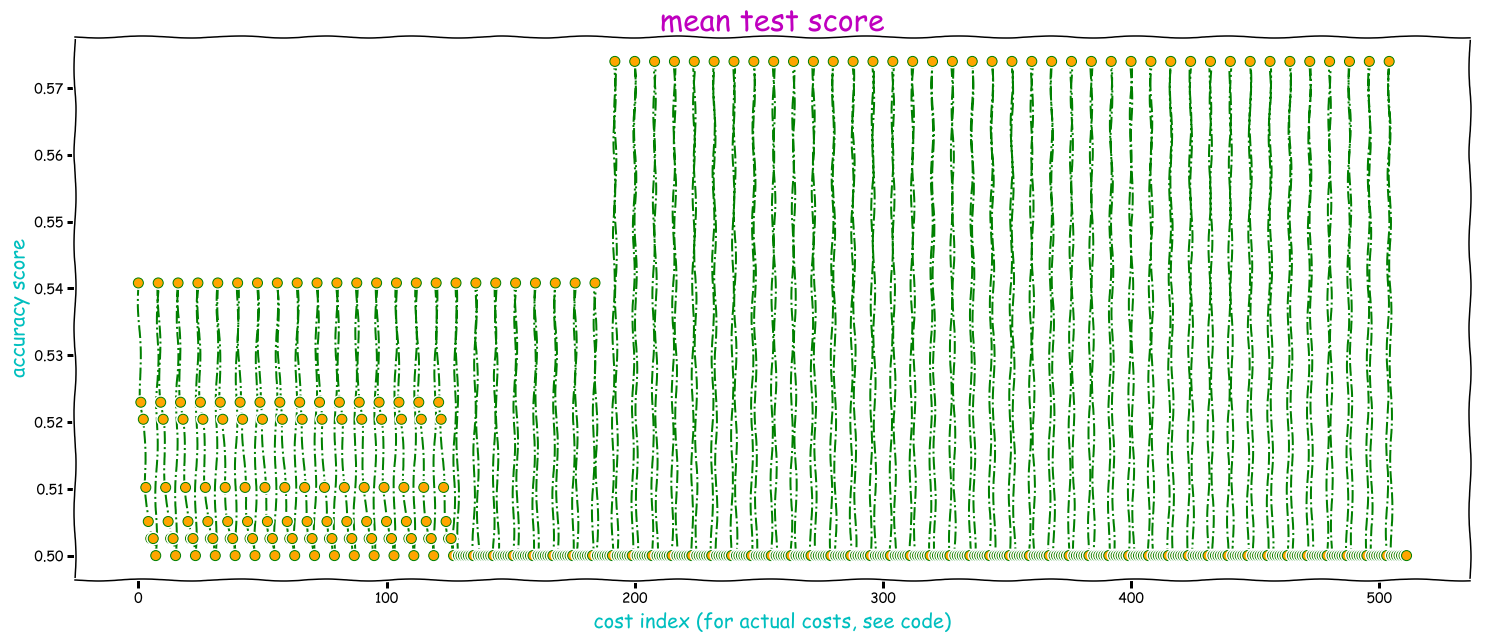

In [118]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(means, ls='-.', color='green', marker='o', markersize=10, markerfacecolor='orange')
plt.title('mean test score', fontsize=30, color='m')
plt.xlabel('cost index (for actual costs, see code)', fontsize=20, color='c')
plt.ylabel('accuracy score', fontsize=20, color='c')

***

## 9.d. Plotting SVM results

In [212]:
Ypred = svmfit10.predict(df)

In [213]:
list(df)

['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'hp']

In [216]:
xx = df[['cylinders', 'displacement']]

In [218]:
svmfitxx = SVC(kernel='linear').fit(xx, Y)

In [228]:
svmpredxx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [229]:
dfpred = pd.concat([xx, pd.DataFrame([svmpredxx]).T], axis=1)

In [232]:
dfpred.columns = ['cylinders', 'displacement', 'predict']
dfpred.head()

,cylinders,displacement,predict
0,8,400.0,0
1,8,455.0,0
2,8,455.0,0
3,8,455.0,0
4,8,454.0,0


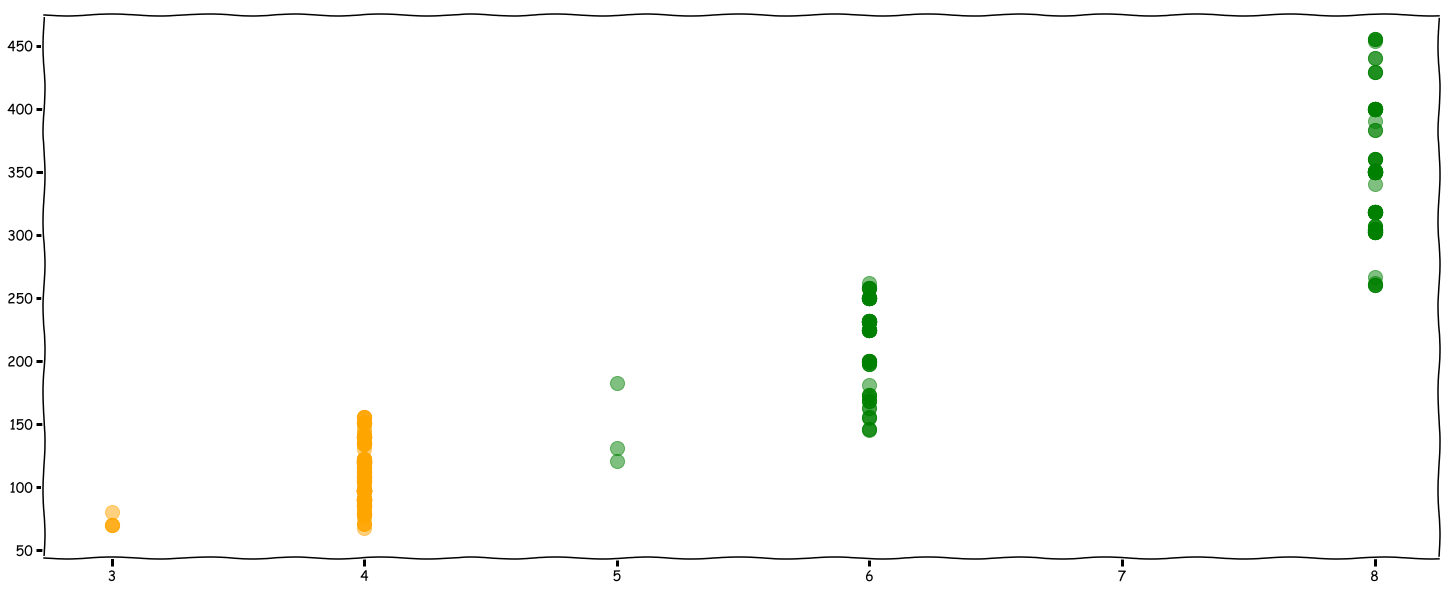

In [237]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(dfpred.cylinders[dfpred.predict==0], dfpred.displacement[dfpred.predict==0], color='green', s=200, alpha=0.5)
plt.scatter(dfpred.cylinders[dfpred.predict==1], dfpred.displacement[dfpred.predict==1], color='orange', s=200, alpha=0.5)

In [250]:
list(df)

['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'hp']

In [251]:
xx = df[['weight', 'displacement']]

In [252]:
svmfitxx = SVC(kernel='linear').fit(xx, Y)

In [253]:
svmpredxx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [254]:
dfpred = pd.concat([xx, pd.DataFrame([svmpredxx]).T], axis=1)

In [255]:
dfpred.columns = ['weight', 'displacement', 'predict']
dfpred.head()

,weight,displacement,predict
0,4278,400.0,0
1,4425,455.0,0
2,3086,455.0,0
3,4951,455.0,0
4,4354,454.0,0


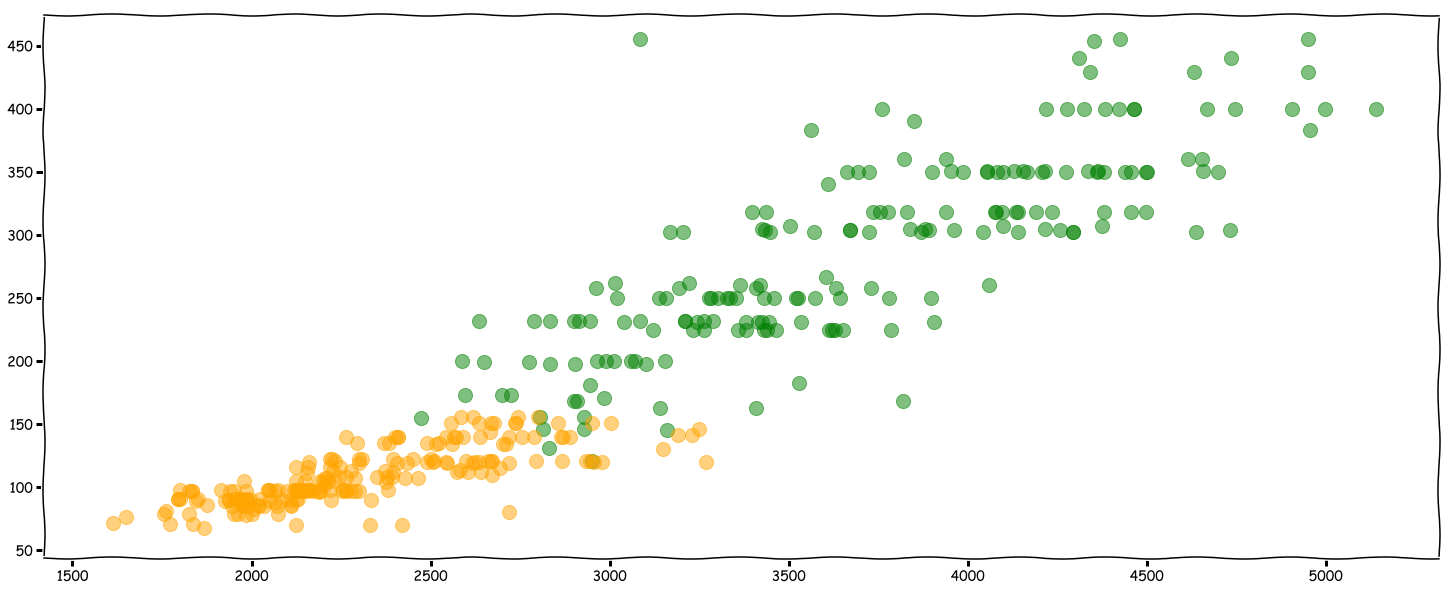

In [257]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(dfpred.weight[dfpred.predict==0], dfpred.displacement[dfpred.predict==0], color='green', s=200, alpha=0.5)
plt.scatter(dfpred.weight[dfpred.predict==1], dfpred.displacement[dfpred.predict==1], color='orange', s=200, alpha=0.5)

In [258]:
list(df)

['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'hp']

In [259]:
xx = df[['acceleration', 'hp']]

In [260]:
svmfitxx = SVC(kernel='linear').fit(xx, Y)

In [261]:
svmpredxx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [262]:
dfpred = pd.concat([xx, pd.DataFrame([svmpredxx]).T], axis=1)

In [263]:
dfpred.columns = ['acceleration', 'hp', 'predict']
dfpred.head()

,acceleration,hp,predict
0,9.5,230.0,0
1,10.0,225.0,0
2,10.0,225.0,0
3,11.0,225.0,0
4,9.0,220.0,0


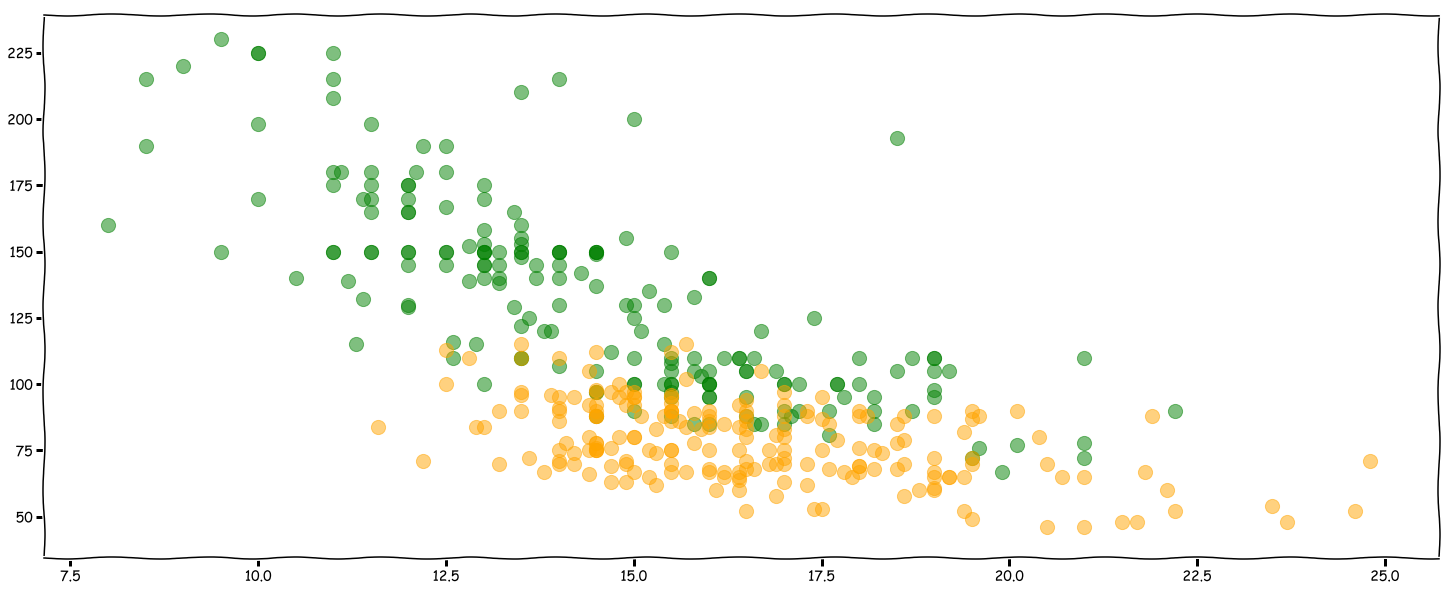

In [264]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(dfpred.acceleration[dfpred.predict==0], dfpred.hp[dfpred.predict==0], color='green', s=200, alpha=0.5)
plt.scatter(dfpred.acceleration[dfpred.predict==1], dfpred.hp[dfpred.predict==1], color='orange', s=200, alpha=0.5)

In [265]:
list(df)

['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'hp']

In [266]:
xx = df[['acceleration', 'hp']]

In [272]:
svmfitxx = SVC(kernel='rbf', C=1000, degree=3, gamma=10).fit(xx, Y)

In [273]:
svmpredxx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [274]:
dfpred = pd.concat([xx, pd.DataFrame([svmpredxx]).T], axis=1)

In [275]:
dfpred.columns = ['acceleration', 'hp', 'predict']
dfpred.head()

,acceleration,hp,predict
0,9.5,230.0,0
1,10.0,225.0,0
2,10.0,225.0,0
3,11.0,225.0,0
4,9.0,220.0,0


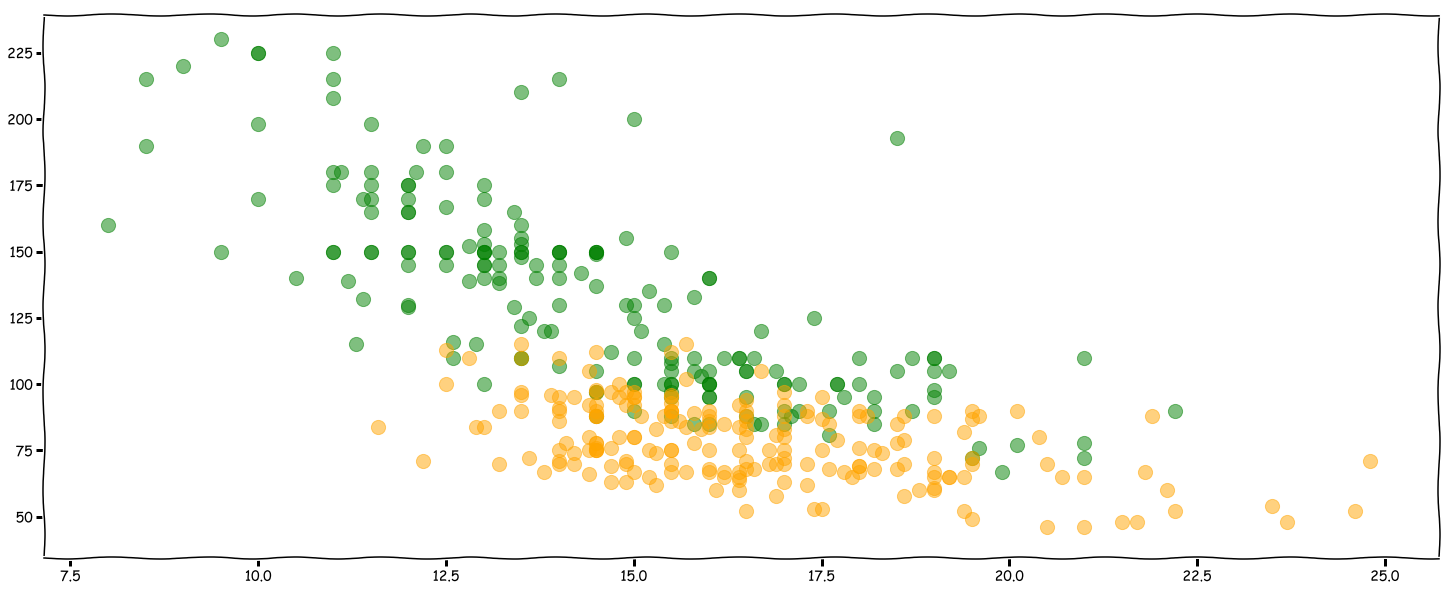

In [276]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(dfpred.acceleration[dfpred.predict==0], dfpred.hp[dfpred.predict==0], color='green', s=200, alpha=0.5)
plt.scatter(dfpred.acceleration[dfpred.predict==1], dfpred.hp[dfpred.predict==1], color='orange', s=200, alpha=0.5)